In [1]:
import geopandas as gpd
import pyproj
import matplotlib.pyplot as plt
import folium
import contextily as ctx
from folium.plugins import HeatMap
import plotly.express as px



In [2]:
blocos = gpd.read_file('data/blocos_2020.shp')

print(blocos.head())

   id                        nome         dia   hora  \
0   1        Mulheres de Carnaval  2020-02-15  11:00   
1   2  Essa Boquinha Eu Já Beijei  2020-02-15  11:00   
2   3       Nana Banana Bloquinho  2020-02-15  13:00   
3   4                   Galo Cego  2020-02-15  14:00   
4   5                Pauta na Rua  2020-02-15  16:00   

                            geometry  
0  POINT (-5329902.545 -1780292.187)  
1  POINT (-5331800.090 -1780302.408)  
2  POINT (-5352776.499 -1791842.800)  
3  POINT (-5330185.734 -1781429.150)  
4  POINT (-5333231.967 -1781412.917)  


In [3]:
blocos = blocos.to_crs(epsg=4326)

blocos["x"] = blocos["geometry"].apply(lambda geom: geom.x)
blocos["y"] = blocos["geometry"].apply(lambda geom: geom.y)

loc = list(zip(blocos["y"], blocos["x"]))
print(loc[:4])

[(-15.788927089722067, -47.87932919019098), (-15.789015444473506, -47.896375126521214), (-15.888748531682253, -48.084809418881335), (-15.798755020233463, -47.88187311795138)]


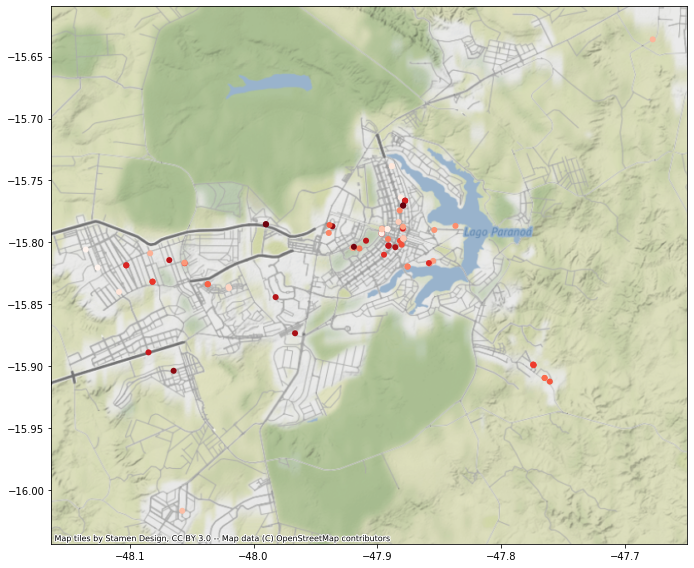

In [4]:
fig, ax = plt.subplots(figsize=(12,8))

blocos.plot(ax=ax, column="nome", linewidth=0.03, cmap="Reds")

plt.tight_layout()

ctx.add_basemap(ax, crs=blocos.crs)


outfp = "static_map.png"
plt.savefig(outfp, dpi=300)

In [5]:
pts_gjson = folium.features.GeoJson(blocos, name="Blocos de carnaval 2020")

m = folium.Map(location=[-15.788497,-47.879873],  tiles = "CartoDB dark_matter", zoom_start=10, control_scale=True)

# parametros: HeatMap(data, name=None, min_opacity=0.5, max_zoom=18, max_val=1.0, radius=25, blur=15, gradient=None, overlay=True, control=True, show=True)
HeatMap(loc).add_to(m)
pts_gjson.add_to(m)
m

In [7]:
import plotly.graph_objects as go
mapbox_access_token = open("data/tk.mapbox_token").read()

site_lat = blocos.y
site_lon = blocos.x
name = blocos['nome']
date = blocos['dia']
hour = blocos['hora']

fig = go.Figure()

fig.add_trace(go.Scattermapbox(
        lat=site_lat,
        lon=site_lon,
        mode='markers',
        marker=go.scattermapbox.Marker(
            size=4,
            color='rgb(0, 0, 0)',
            opacity=0.9
        ),
        hovertext= name + "\n " + date+ "\n "  + hour,
        hoverinfo= 'text'
    ))

fig.add_trace(go.Densitymapbox(lat=site_lat, lon=site_lon, 
                                 radius=15, hoverinfo='skip', showscale=False))

fig.update_layout(
    title='Blocos de carnaval DF-2020',
    autosize=True,
    hovermode='closest',
    showlegend=False,
    mapbox=dict(
        accesstoken=mapbox_access_token,
        bearing=0,
        center=dict(lat=-15.788497, lon=-47.879873),
        pitch=0,
        zoom=9,
        style='dark'
    ),
)

fig.show()
fig.save('data/fig.html')

AttributeError: 'Figure' object has no attribute 'save'